<a href="https://colab.research.google.com/github/farzin23i/SciSchool-Introduction_to_Machine_Learning/blob/main/week3/OnlineSession3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Clustering Examples

## Iris Dataset

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris ()

In [ ]:
iris.keys ()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data = iris['data']
target = iris['target']
colors = np.array(['red','blue','green'])

In [ ]:
df = pd.DataFrame (data, columns= iris['feature_names'])
df.head ()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

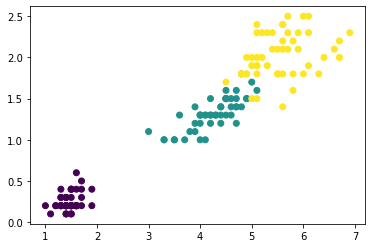

In [ ]:
plt.scatter(data[:,2],data[:,3],c=target)

In [ ]:
from sklearn.cluster import KMeans , MeanShift

In [ ]:
kmeans = KMeans (n_clusters=3)
kmeans.fit (data)

KMeans(n_clusters=3)

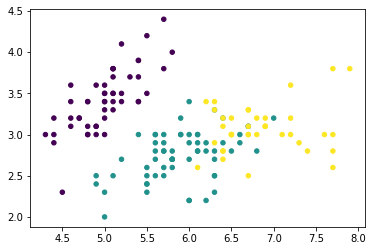

In [ ]:
plt.scatter(data[:,0], data[:,1],s=20, c=kmeans.predict(data))

In [ ]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [ ]:
target 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
help (kmeans)

In [ ]:
# kmeans.feature_importance_

In [ ]:
from sklearn.metrics.cluster import completeness_score

In [ ]:
completeness_score (labels_true=target, labels_pred=kmeans.labels_)

0.7649861514489815

In [ ]:
from sklearn.metrics.cluster import homogeneity_score


In [ ]:
homogeneity_score (labels_true=target, labels_pred=kmeans.labels_)


0.7514854021988338

Not so bad!

### DBSCAN

In [ ]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(data)

db = DBSCAN(eps=0.6, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [ ]:
labels

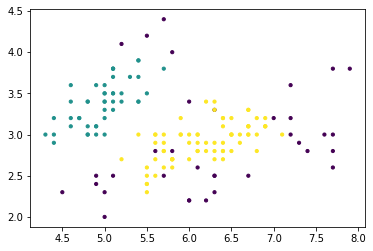

In [ ]:
plt.scatter(data[:,0], data[:,1],s=10,c=labels)

In [ ]:
completeness_score (labels_true=target, labels_pred=labels)

0.5216394345868504

In [ ]:
homogeneity_score (labels_true=target, labels_pred=labels)


0.5016078360095262

Worse than kmeans!

## Digits Clustering 

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [ ]:
digits.keys ()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
y = digits.target 
y.shape 

(1797,)

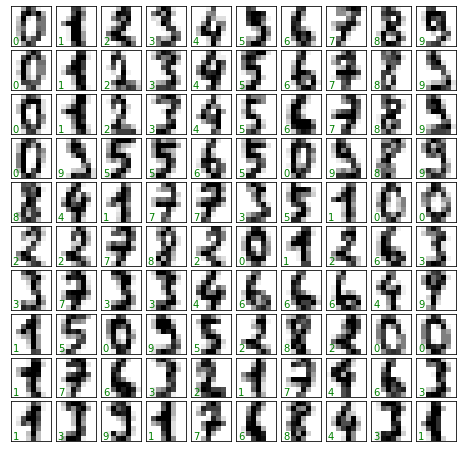

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [ ]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
X = digits.images.reshape (1797, -1)
X.shape 

(1797, 64)

In [ ]:
kmeans = KMeans(n_clusters=10)
kmeans.fit (X)

KMeans(n_clusters=10)

In [ ]:
labels = kmeans.labels_
labels.shape 

(1797,)

In [ ]:
labels [:20]

array([2, 9, 9, 8, 6, 4, 0, 5, 4, 4, 2, 1, 3, 8, 6, 7, 0, 5, 9, 4],
      dtype=int32)

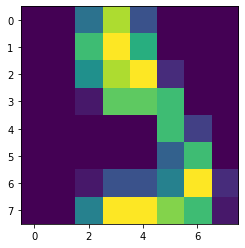

In [ ]:
plt.imshow (X[19].reshape (8,8))

In [ ]:
completeness_score (labels_true=y, labels_pred=labels)

0.7456457240069345

In [ ]:
homogeneity_score (labels_true=y, labels_pred=labels)

0.7376142946595862

### What about MeanShift?

In [ ]:
ms = MeanShift()
ms.fit(X)

# plt.scatter(X[:,0], X[:,1],s=10, c=ms.predict(X), cmap='inferno')

MeanShift()

In [ ]:
ms.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
completeness_score (labels_true=y, labels_pred=ms.predict(X))

1.0

In [ ]:
homogeneity_score (labels_true=y, labels_pred=ms.predict(X))

0.0

# Anomaly Detection

In [ ]:
data = np.random.normal(size=1000)

### Isolation Forest
* Based on RandomForest
* Useful in detecting outliers in high dimension datasets.
* This algorithm randomly selects a feature & splits further.
* Random partitioning produces shorter part for anomolies.
* When a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

In [ ]:
rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

In [ ]:
data = np.r_[X_train,X_test,X_outliers]

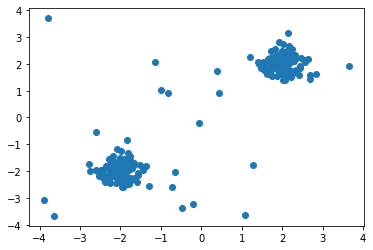

In [ ]:
plt.scatter(data[:,0], data[:,1])

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
iso = IsolationForest(contamination='auto')

In [ ]:
iso.fit(data)
pred = iso.predict(data)

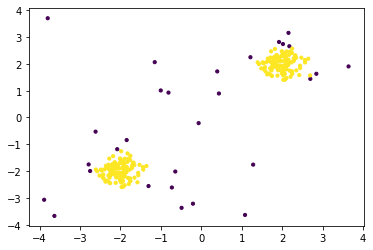

In [ ]:
plt.scatter(data[:,0], data[:,1],s=10,c=pred)

### Local Outlier Factor
* Based on nearest neighbours
* Suited for moderately high dimension datasets
* LOF computes a score reflecting degree of abnormility of a data.
* LOF Calculation
  - Local density is calculated from k-nearest neighbors.
  - LOF of each data is equal to the ratio of the average local density of his k-nearest neighbors, and its own local density.
  - An abnormal data is expected to have smaller local density.
* LOF tells you not only how outlier the data is but how outlier is it with respect to all data

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
lof = LocalOutlierFactor(n_neighbors=25,contamination=.1)

In [ ]:
pred = lof.fit_predict(data)

In [ ]:
s = np.abs(lof.negative_outlier_factor_)

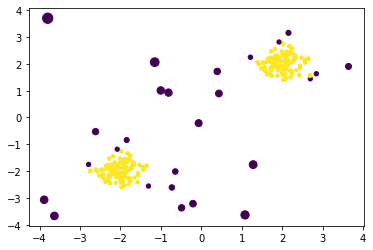

In [ ]:
plt.scatter(data[:,0], data[:,1],s=s*10,c=pred)

### Outlier Detection using DBSCAN
* DBSCAN is a clustering method based on density
* Groups data which are closer to each other.
* Doesn't use distance vector calculation method
* Data not close enough to any cluster is not assigned any cluster & these can be anomalies

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=.3)

In [ ]:
dbscan.fit(data)

DBSCAN(eps=0.3)

In [ ]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1, -1,  1

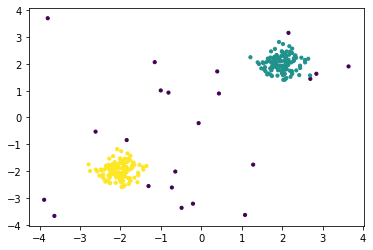

In [ ]:
plt.scatter(data[:,0], data[:,1],s=10,c=dbscan.labels_)

# Feature Selection

In [60]:
from sklearn import feature_selection

### VarianceThreshold
* Drop the columns whose variance is below configured level
* This method is unsupervised .i.e target not taken into action
* Intution : Columns whose values arn't petty much the same won't have much impact on target

In [ ]:
df = pd.DataFrame({'A':['m','f','m','m','m','m','m','m'], 
              'B':[1,2,3,1,2,1,1,1], 
              'C':[1,2,3,1,2,1,1,1]})

In [ ]:
df

,A,B,C
0,m,1,1
1,f,2,2
2,m,3,3
3,m,1,1
4,m,2,2
5,m,1,1
6,m,1,1
7,m,1,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['A'] = le.fit_transform(df.A)

In [ ]:
df

,A,B,C
0,1,1,1
1,0,2,2
2,1,3,3
3,1,1,1
4,1,2,2
5,1,1,1
6,1,1,1
7,1,1,1


In [ ]:
vt = feature_selection.VarianceThreshold(threshold=.2)

In [ ]:
vt.fit_transform(df)

array([[1, 1],
       [2, 2],
       [3, 3],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1]])

In [ ]:
vt.variances_

array([0.109375, 0.5     , 0.5     ])

### Mutual Information for classification using mutual_info_classification
* Returns dependency in the scale of 0 & 1 among feature & target
* Captures any kind of dependency even if non-linear
* Target is discrete in nature

In [ ]:
cols = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship'
        ,'race','sex','capital-gain','capital-loss','hours-per-week','native-country','Salary']
adult_data = pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/adult.data.txt', names=cols)

In [ ]:
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
cat_cols = list(adult_data.select_dtypes('object').columns)

In [ ]:
cat_cols.remove('Salary')

In [ ]:
len(cat_cols)

8

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for col in cat_cols:
    le = LabelEncoder()
    adult_data[col]  = le.fit_transform(adult_data[col])

In [ ]:
X = adult_data.drop(columns=['Salary'])
y = le.fit_transform(adult_data.Salary)

In [ ]:
firep = feature_selection.mutual_info_classif(X, y)

In [ ]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [ ]:
X.columns[np.argsort(firep)[::-1]]

Index(['relationship', 'marital-status', 'capital-gain', 'education-num',
       'occupation', 'education', 'age', 'hours-per-week', 'capital-loss',
       'fnlwgt', 'sex', 'workclass', 'native-country', 'race'],
      dtype='object')

### SelectKBest
* SelectKBest returns K important features based on above techniques
* Based on configuration, it can use mutual_information or ANOVA or regression based techniques

In [ ]:
adult_data.head
adult_data.shape

(32561, 15)

In [ ]:
selector = feature_selection.SelectKBest(k=7, score_func=feature_selection.f_classif)

In [ ]:
data = selector.fit_transform(adult_data.drop('Salary',axis=1),adult_data.Salary)
data.shape

(32561, 7)

In [ ]:
selector.scores_

array([1.88670731e+03, 8.69361605e+01, 2.91559359e+00, 2.06129509e+02,
       4.12009578e+03, 1.34685178e+03, 1.86500322e+02, 2.18764583e+03,
       1.68934788e+02, 1.59310791e+03, 1.70915006e+03, 7.54830452e+02,
       1.81338628e+03, 8.17155711e+00])

In [ ]:
selector = feature_selection.SelectKBest(k=7, score_func=feature_selection.mutual_info_classif)

In [ ]:
data = selector.fit_transform(adult_data.drop('Salary',axis=1),adult_data.Salary)
data.shape

(32561, 7)

In [ ]:
selector.scores_

array([0.06690401, 0.01370925, 0.03250768, 0.0669169 , 0.06777548,
       0.10981125, 0.0656777 , 0.11179161, 0.009932  , 0.02940243,
       0.08507063, 0.03616073, 0.04119909, 0.00730487])

### SelectPercentile
* Selecting top features whose importances are in configured parameter
* Default is top 10 percentile

In [ ]:
selector = feature_selection.SelectPercentile(percentile=20, score_func=feature_selection.mutual_info_classif)

In [ ]:
data = selector.fit_transform(adult_data.drop('Salary',axis=1),adult_data.Salary)
data.shape

(32561, 3)